WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Loading historical data from cache...
Loading historical data from cache...
Loading historical data from cache...
mu_mean: 0.1504, mu_std: 0.4150
sigma_mean: 0.4150, sigma_std: 0.1527


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


Start Price: 45.42


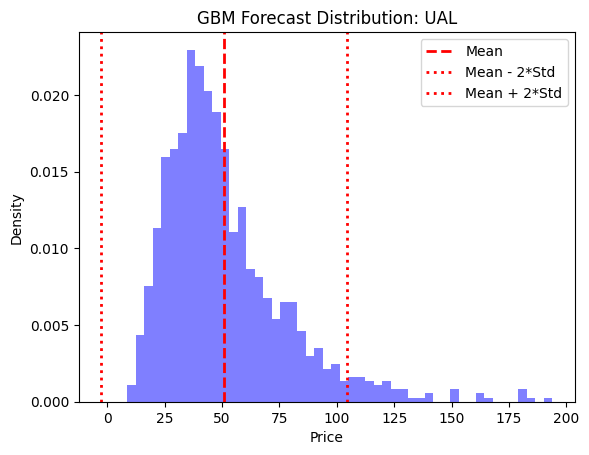

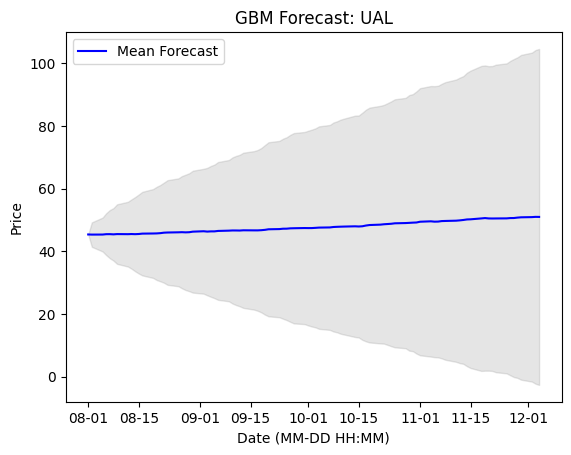


95% Confidence Interval:
Lower Bound: -2.60
Upper Bound: 104.63

Coverage Probability: 0.95
Number of Simulations Above Upper Bound: 47
Number of Simulations Below Lower Bound: 0


<Figure size 640x480 with 0 Axes>

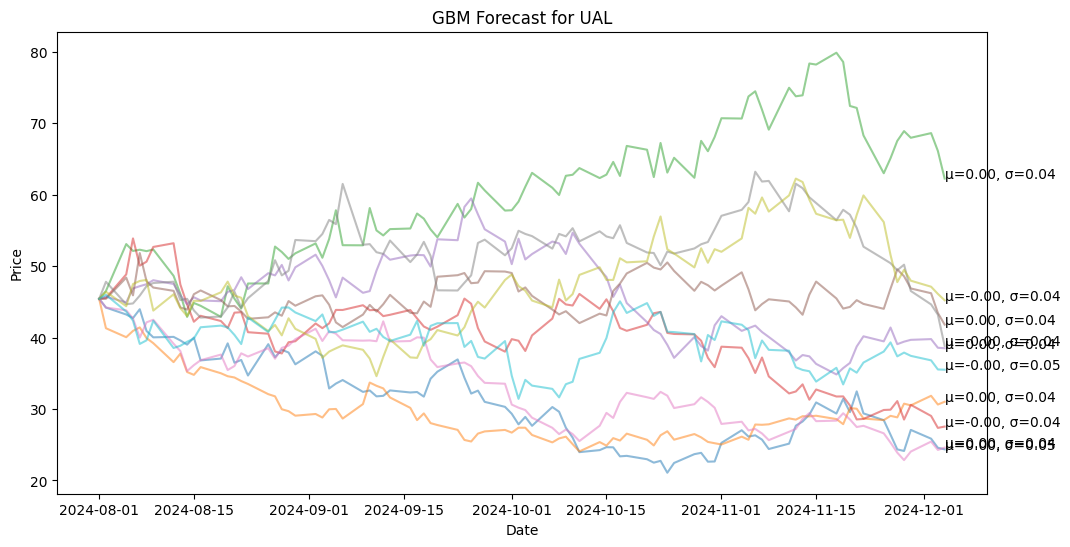

Simulation 1 MSE: 1749.8461732565024
Simulation 2 MSE: 1711.7402825149397
Simulation 3 MSE: 181.76725255480443
Simulation 4 MSE: 1240.5398850196218
Simulation 5 MSE: 961.3019127933273
Simulation 6 MSE: 753.527598619607
Simulation 7 MSE: 1622.4330600438448
Simulation 8 MSE: 512.819194911719
Simulation 9 MSE: 545.388509199306
Simulation 10 MSE: 1108.0390627802142
Simulation 11 MSE: 978.1589704827959
Simulation 12 MSE: 186.3908057164799
Simulation 13 MSE: 831.2234484797837
Simulation 14 MSE: 703.7493528475874
Simulation 15 MSE: 1409.775464460769
Simulation 16 MSE: 1873.8293088576718
Simulation 17 MSE: 106.88920766149562
Simulation 18 MSE: 678.5547173594402
Simulation 19 MSE: 1483.5828108433104
Simulation 20 MSE: 944.3351565493267
Simulation 21 MSE: 882.6767114434872
Simulation 22 MSE: 657.7722069813694
Simulation 23 MSE: 406.034473511184
Simulation 24 MSE: 87.64395075148323
Simulation 25 MSE: 978.2214349192509
Simulation 26 MSE: 1329.2753883125035
Simulation 27 MSE: 2275.053206777647
Simu

In [1]:




from backtester import Backtester
import matplotlib.pyplot as plt
# ignore warnings
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

stock = 'UAL'
time_periods = 90
gbm_params = {
    'threshold': 2,
    'time_periods': time_periods,
    'num_simulations': 1000,
}
backtester = Backtester(stock, 'SMART', 'USD')
# data will be the most recent year of data, excluding the last 90 days. this is 
# because we will use the last 90 days as the test data
df = backtester.one_yr_1d_data
# is df a pandas dataframe?


# train data is the data excluding the last 90 days
train_data = df[df.index < df.index[-time_periods]]
test_data = df['close'][df.index >= df.index[-time_periods]]



simulations, associated_mu, associated_sigma, forecast_dates = backtester.forecast_data(gbm_params,train_data)
# we will use the last 90 days of data to test the model

mses = []
for i in range(gbm_params['num_simulations']):
    simulation = simulations[i]
    mse = sum((test_data - simulation) ** 2) / len(test_data)
    mses.append(mse)
    print(f'Simulation {i+1} MSE: {mse}')








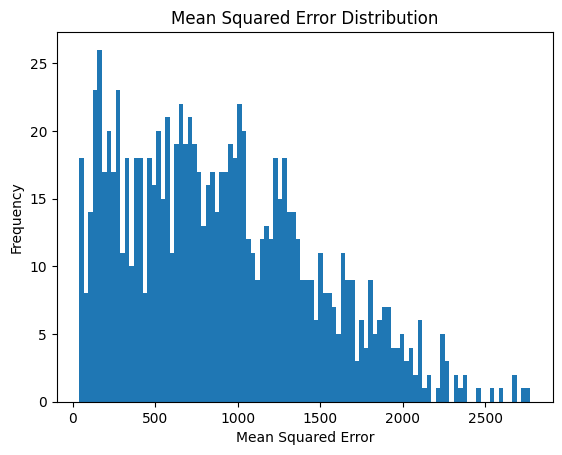

Simulation 1 MSE: 39.46915194146894
Associated mu: 0.006284324554679218
Associated sigma: 0.044445597918754125
Simulation 2 MSE: 40.95532809045929
Associated mu: 0.005549794804193799
Associated sigma: 0.0439902673454071
Simulation 3 MSE: 44.45385098899659
Associated mu: 0.0055168247410641285
Associated sigma: 0.042062986725720584
Simulation 4 MSE: 44.90199280750038
Associated mu: 0.001224577486341716
Associated sigma: 0.045222780584246926
Simulation 5 MSE: 46.12911994160768
Associated mu: 0.0018121301358421575
Associated sigma: 0.047636260803436366
Simulation 6 MSE: 46.93152320249304
Associated mu: 0.004858046465313377
Associated sigma: 0.042964301528233675
Simulation 7 MSE: 48.2920630409273
Associated mu: 0.007225434055792303
Associated sigma: 0.03854261173885786
Simulation 8 MSE: 49.08713877804994
Associated mu: 0.003599433101939835
Associated sigma: 0.042747905880427206
Simulation 9 MSE: 49.098729669283024
Associated mu: 0.008976938520740036
Associated sigma: 0.0424060490547464
Simu

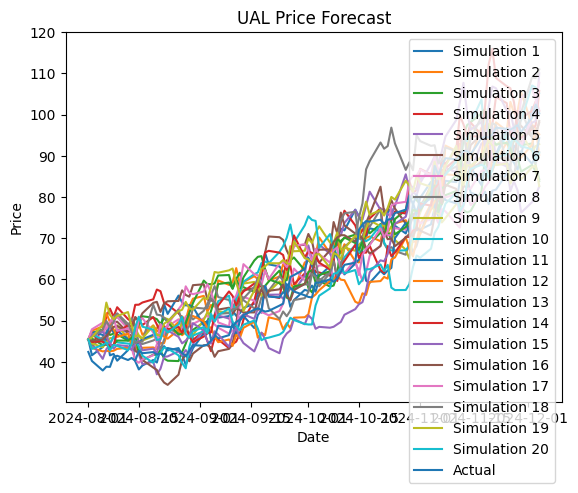

In [ ]:
# study the distribution of the mean squared errors
# disgard inf
plt.hist(mses, bins=100)
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Mean Squared Error Distribution')
plt.show()

# i want to do analysis on say how confident the model is in its predictions
# show some of the simulations that have the lowest mean squared error

# mses is a list of mean squared errors for each simulation
# plot the simulations with the 5 lowest mean squared error
for i in range(20):
    plt.plot(forecast_dates, simulations[mses.index(min(mses))], label=f'Simulation {i+1}')
    print(f'Simulation {i+1} MSE: {min(mses)}')
    # print the associated mu and sigma
    print(f'Associated mu: {associated_mu[mses.index(min(mses))]}')
    print(f'Associated sigma: {associated_sigma[mses.index(min(mses))]}') 
    mses[mses.index(min(mses))] = float('inf')

plt.plot(forecast_dates, test_data, label='Actual')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock} Price Forecast')
plt.show()